# Install TensorFlow2 Object Detection Dependencies



In [1]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 1927, done.
remote: Counting objects: 100% (1927/1927), done.
remote: Compressing objects: 100% (1684/1684), done.
remote: Total 1927 (delta 444), reused 769 (delta 225), pack-reused 0
Receiving objects: 100% (1927/1927), 30.09 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [2]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
%cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
     |████████████████████████████████| 8.3MB 4.3MB/s 
     |████████████████████████████████| 358kB 39.7MB/s 
     |████████████████████████████████| 849kB 39.3MB/s 
     |████████████████████████████████| 829kB 42.1MB/s 
     |████████████████████████████████| 153kB 39.4MB/s 
     |████████████████████████████████| 63.8MB 47kB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 1.4MB 40.1MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 1.1MB 40.5MB/s 
     |████████████████████████████████| 174kB 45.0MB/s 
     |████████████████████████████████| 36.6MB 83kB/s 
     |████████████████████████████████| 112kB 45.1MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1550866 sha256=c0

In [4]:
!pip uninstall tensorflow
!pip install tensorflow-gpu

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 320.4MB 55kB/s 


# Test the installation

In [10]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2020-08-23 09:28:23.732858: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2020-08-23 09:28:26.471847: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-23 09:28:26.539330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-23 09:28:26.540114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-08-23 09:28:26.540159: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfull

# Prepare datasets

In [11]:
# Connect to your drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
# Copy dataset from drive to /content/models/research/object_detection/
%cp /content/drive/My\ Drive/pedestrian_tfrecord.zip /content/models/research/object_detection/

In [13]:
%cd /content/models/research/object_detection/
!unzip pedestrian_tfrecord.zip

/content/models/research/object_detection
Archive:  pedestrian_tfrecord.zip
   creating: pedestrian_tfrecord/
  inflating: pedestrian_tfrecord/README.md  
   creating: pedestrian_tfrecord/train/
  inflating: pedestrian_tfrecord/train/pedestrian.tfrecord  
  inflating: pedestrian_tfrecord/train/pedestrian_label_map.pbtxt  
   creating: pedestrian_tfrecord/valid/
  inflating: pedestrian_tfrecord/valid/pedestrian.tfrecord  
  inflating: pedestrian_tfrecord/valid/pedestrian_label_map.pbtxt  


# Download pre-trained model

In [14]:
# We will use Faster R-CNN ResNet50 V1 640x640 pre-trained model
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

--2020-08-23 09:42:45--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.189.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  45.6MB/s    in 4.4s    

2020-08-23 09:42:50 (45.6 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]



In [15]:
# Extract the downloaded model
!tar -xvzf faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [16]:
# Download config file
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config

--2020-08-23 09:46:15--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3559 (3.5K) [text/plain]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config’

faster_rcnn_resnet5 100%[===================>]   3.48K  --.-KB/s    in 0s      

2020-08-23 09:46:16 (55.1 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config’ saved [3559/3559]



In [21]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re

print('writing custom configuration file')

with open('/content/models/research/object_detection/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.config') as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format('/content/models/research/object_detection/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0'), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format('/content/models/research/object_detection/pedestrian_tfrecord/train/pedestrian.tfrecord'), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format('/content/models/research/object_detection/pedestrian_tfrecord/valid/pedestrian.tfrecord'), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format('/content/models/research/object_detection/pedestrian_tfrecord/train/pedestrian_label_map.pbtxt'), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(1), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(30000), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(1), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)


writing custom configuration file


# Start the training

In [22]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path='pipeline_file.config' \
    --model_dir='training' \
    --alsologtostderr \
    --num_train_steps=5000 \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps=500

2020-08-23 10:05:48.123222: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-23 10:05:50.587137: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-23 10:05:50.604561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-23 10:05:50.605400: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-08-23 10:05:50.605447: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-23 10:05:50.607712: I tensorflow/stream_executor/platform/defa

# Export training inference

In [23]:
# Check the model saved weights
%ls training/

checkpoint                  ckpt-4.data-00000-of-00001
ckpt-1.data-00000-of-00001  ckpt-4.index
ckpt-1.index                ckpt-5.data-00000-of-00001
ckpt-2.data-00000-of-00001  ckpt-5.index
ckpt-2.index                ckpt-6.data-00000-of-00001
ckpt-3.data-00000-of-00001  ckpt-6.index
ckpt-3.index                train/


In [24]:
#run conversion script
import re
import numpy as np

output_directory = 'saved_model'

#place the model weights you would like to export here
last_model_path = 'training/'
print(last_model_path)
!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir 'training/' \
    --output_directory 'saved_model/' \
    --pipeline_config_path 'pipeline_file.config'

training/
2020-08-23 10:40:30.187753: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-23 10:40:32.368605: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-23 10:40:32.388313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-23 10:40:32.389096: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-08-23 10:40:32.389149: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-23 10:40:32.391006: I tensorflow/stream_executor/pla

# Test the model

In [25]:
%mkdir test
%cd test/
from google.colab import files
from os import path
uploaded = files.upload()
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

/content/models/research/object_detection/test


Saving ped_1.jpg to ped_1.jpg
Saving ped_2.jpg to ped_2.jpg
Saving ped_3.jpg to ped_3.jpg
Saving ped_4.jpg to ped_4.jpg
saved file ped_1.jpg
saved file ped_2.jpg
saved file ped_3.jpg
saved file ped_4.jpg


In [26]:
%cd ..

/content/models/research/object_detection


In [27]:
# Import necessary packages
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [28]:
# Function to load the images
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [32]:
# Recover our saved model
# Put the last ckpt from training in here
import os
model_dir = 'training/ckpt-6'
configs = config_util.get_configs_from_pipeline_file('pipeline_file.config')
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('training/ckpt-6'))

In [33]:
def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [36]:
#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

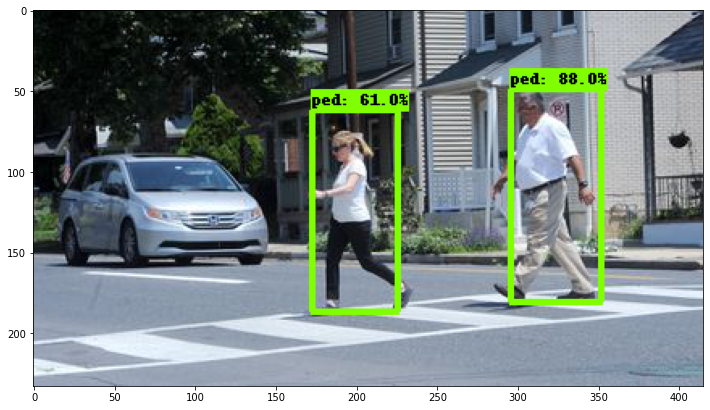

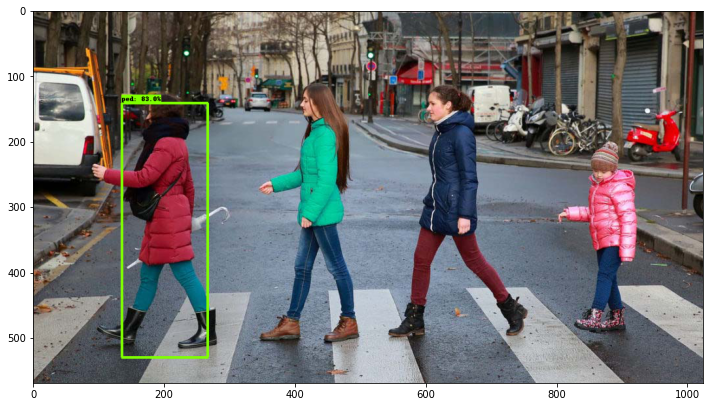

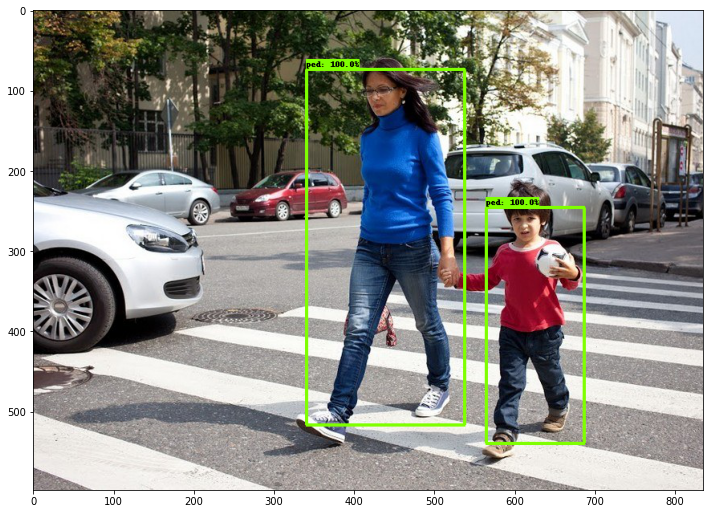

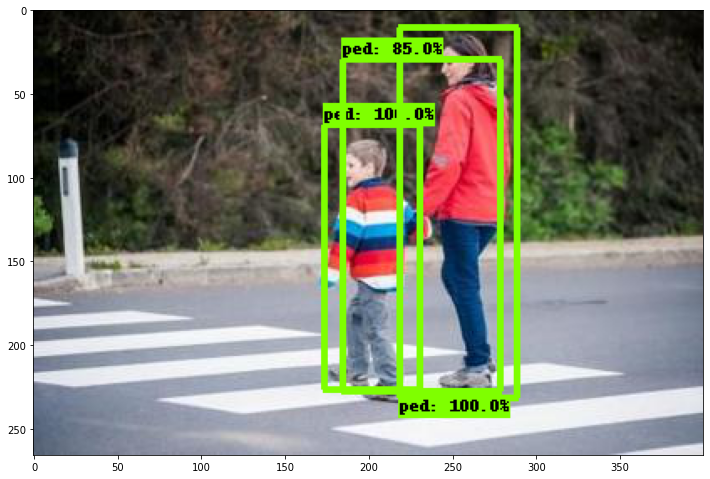

In [40]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random
import glob
TEST_IMAGE_PATHS = glob.glob('test/*.jpg')
# image_path = random.choice(TEST_IMAGE_PATHS)
for image_path in TEST_IMAGE_PATHS:
  # image_path = '/content/test/ped_4.jpg'
  image_np = load_image_into_numpy_array(image_path)

  # Things to try:
  # Flip horizontally
  # image_np = np.fliplr(image_np).copy()

  # Convert image to grayscale
  # image_np = np.tile(
  #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

  input_tensor = tf.convert_to_tensor(
      np.expand_dims(image_np, 0), dtype=tf.float32)
  detections, predictions_dict, shapes = detect_fn(input_tensor)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.5,
        agnostic_mode=False,
  )

  plt.figure(figsize=(12,16))
  plt.imshow(image_np_with_detections)
  plt.show()

# Copy the checkpoints and the model to your drive

In [41]:
%cp -r training /content/drive/My\ Drive
%cp -r saved_model/ /content/drive/My\ Drive